### NHL season 2023 - 2024 player data insights


##### Overview

Data is from season 2023 - 2024 NHL players.
- I will visualize the data and look for insights
- Distribution of player statistics (e.g., age, points, salary)

##### Explaining columns
- DRAFTED = draft number - round - year(team)
- GP = Games Played
- G = Goal
- A = Assist
- P = Points
- +/- = Plus/Minus
- Sh = Shots on goal
- Sh% = Shoot percent
- TOI = Time on ice
- W = Win (Goalie stats)
- L = Loss (Goalie stats)
- SO = Shutouts (Goalie stats)
- GAA = Goals against average (Goalie stats)
- Sv% = Save percentage (Goalie stats)
- TYPE = Contract type
- SIGNING AGE = Player age when signing contract
- LENGTH = Contract length

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "NHLseason2024.csv"

data = []
# Read tab separated file
with open(file, 'r', encoding='ISO-8859-1') as file:

    # For using the header as column in dataframe
    header = file.readline().strip().split('\t')
    
    for line in file:
        #print(line)
        # Split the line into columns using the tab delimiter
        columns = line.strip().split('\t')
        data.append(columns)

In [3]:
# Create a DataFrame from the list
df = pd.DataFrame(data, columns=header)
# Display the first few rows of the DataFrame
df

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,L,SO,GAA,Sv%,TYPE,SIGNING AGE,LENGTH,EXPIRY,CAP HIT,SALARY
0,1. Auston Matthews,TOR,26,"Sep. 17, 1997",United States,98,191,C,Left,1 - Round 1 - 2016 (TOR),...,-,-,-,-,Standard (1-way),26,4,UFA,"$13,250,000","$16,700,000"
1,2. Nathan MacKinnon,COL,28,"Sep. 1, 1995",Canada,91,183,C,Right,1 - Round 1 - 2013 (COL),...,-,-,-,-,Standard (1-way),27,8,UFA,"$12,600,000","$16,500,000"
2,3. Elias Pettersson,VAN,25,"Nov. 12, 1998",Sweden,80,188,"C, LW",Left,5 - Round 1 - 2017 (VAN),...,-,-,-,-,Standard (1-way),25,8,UFA,"$11,600,000","$14,500,000"
3,4. William Nylander,TOR,28,"May 1, 1996",Canada,92,183,RW,Right,8 - Round 1 - 2014 (TOR),...,-,-,-,-,Standard (1-way),28,8,UFA,"$11,500,000","$13,500,000"
4,5. Rasmus Dahlin,BUF,24,"Apr. 13, 2000",Sweden,88,191,LD/RD,Left,1 - Round 1 - 2018 (BUF),...,-,-,-,-,Standard (1-way),24,8,UFA,"$11,000,000","$13,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045. Chris Wagner,COL,33,"May 27, 1991",United States,90,183,"RW, C",Right,122 - Round 5 - 2010 (ANA),...,-,-,-,-,Standard (2-way),33,1,UFA,"$775,000","$775,000"
1045,1046. Brett Seney,CHI,28,"Feb. 28, 1996",Canada,79,175,"C, LW",Left,157 - Round 6 - 2015 (NJD),...,-,-,-,-,Standard (2-way),28,1,UFA,"$775,000","$775,000"
1046,1047. Colton Dach,CHI,21,"Jan. 4, 2003",Canada,89,193,C,Left,62 - Round 2 - 2021 (CHI),...,-,-,-,-,Entry-Level,18,3,RFA,"$825,000","$775,000"
1047,1048. Matvei Petrov,EDM,21,"Mar. 12, 2003",Russia,81,188,LW,Right,180 - Round 6 - 2021 (EDM),...,-,-,-,-,Entry-Level,18,3,RFA,"$803,333","$775,000"


In [4]:
# Inspect data types
df.dtypes

PLAYER           object
TEAM             object
AGE              object
DATE OF BIRTH    object
COUNTRY          object
WEIGHT           object
HEIGHT           object
POS              object
HANDED           object
DRAFTED          object
GP               object
G                object
A                object
P                object
P/GP             object
+/-              object
Sh               object
Sh%              object
TOI              object
W                object
L                object
SO               object
GAA              object
Sv%              object
TYPE             object
SIGNING AGE      object
LENGTH           object
EXPIRY           object
CAP HIT          object
SALARY           object
dtype: object

In [5]:
# Preprocessing for datatype changes
try:
    df.replace('-', None, inplace=True)
except AttributeError:
    pass

df["SALARY"] = df["SALARY"].str.replace(",", "").str.replace("$", "")
df["CAP HIT"] = df["CAP HIT"].str.replace(",", "").str.replace("$", "")

# Process TOI
def to_total_minutes(time_str):
    if pd.isna(time_str):  # Check for missing values (NaN)
        return None
    try:
        for i, j in time_str.split(':'):
            minutes = int(i)
            seconds = int(j)
            value = minutes + seconds/60
            return value
    except (ValueError, AttributeError):
            pass

df['TOI'] = df['TOI'].apply(to_total_minutes)

In [6]:
# Checck if all correct
df["TOI"].head(5)

0    2.000000
1    2.033333
2    1.150000
3    1.150000
4    2.083333
Name: TOI, dtype: float64

In [7]:
# Data type changes
def to_numeric(datapoint):
    if pd.isna(datapoint):  # Check for missing values (NaN)
        return None
    try:
        return int(datapoint)
    except (ValueError, TypeError):
        try:
            return float(datapoint)
        except (ValueError, TypeError):
            return datapoint  # Return the original value if it cannot be converted

df["AGE"] = df["AGE"].apply(to_numeric)
df["DATE OF BIRTH"] = pd.to_datetime(df['DATE OF BIRTH'], format='mixed')
df["WEIGHT"] = df["WEIGHT"].apply(to_numeric)
df["HEIGHT"] = df["HEIGHT"].apply(to_numeric)
df["GP"] = df["GP"].apply(to_numeric)
df["G"] = df["G"].apply(to_numeric)
df["A"] = df["A"].apply(to_numeric)
df["P"] = df["P"].apply(to_numeric)
df["P/GP"] = df["P/GP"].apply(to_numeric)
df["+/-"] = df["+/-"].apply(to_numeric)
df["Sh"] = df["Sh"].apply(to_numeric)
df["Sh%"] = df["Sh%"].apply(to_numeric)
df["TOI"] = df["TOI"].apply(to_numeric)

df["SIGNING AGE"] = df["SIGNING AGE"].apply(to_numeric)
df["LENGTH"] = df["LENGTH"].apply(to_numeric)
df["CAP HIT"] = df["CAP HIT"].apply(to_numeric)
df["SALARY"] = df["SALARY"].apply(to_numeric)

# For goalies
df["W"] = df["W"].apply(to_numeric)
df["L"] = df["L"].apply(to_numeric)
df["SO"] = df["SO"].apply(to_numeric)
df["GAA"] = df["GAA"].apply(to_numeric)
df["Sv%"] = df["Sv%"].apply(to_numeric)

In [8]:
df.dtypes

PLAYER                   object
TEAM                     object
AGE                       int64
DATE OF BIRTH    datetime64[ns]
COUNTRY                  object
WEIGHT                    int64
HEIGHT                    int64
POS                      object
HANDED                   object
DRAFTED                  object
GP                        int64
G                       float64
A                       float64
P                       float64
P/GP                    float64
+/-                     float64
Sh                      float64
Sh%                     float64
TOI                     float64
W                       float64
L                       float64
SO                      float64
GAA                     float64
Sv%                     float64
TYPE                     object
SIGNING AGE               int64
LENGTH                    int64
EXPIRY                   object
CAP HIT                   int64
SALARY                    int64
dtype: object

In [9]:
df.describe()

,AGE,DATE OF BIRTH,WEIGHT,HEIGHT,GP,G,A,P,P/GP,+/-,...,TOI,W,L,SO,GAA,Sv%,SIGNING AGE,LENGTH,CAP HIT,SALARY
count,1049.000000,1049,1049.000000,1049.000000,1049.000000,931.000000,931.000000,931.000000,931.000000,931.000000,...,508.000000,118.000000,118.000000,118.000000,118.000000,118.000000,1049.000000,1049.000000,1.049000e+03,1.049000e+03
mean,25.039085,1999-01-01 06:51:49.246901760,87.624404,186.109628,31.691134,6.481203,10.996778,17.477981,0.266767,-0.051557,...,1.208661,8.576271,6.940678,0.932203,1.555508,0.482712,23.408961,3.528122,2.496219e+06,2.619711e+06
min,18.000000,1984-11-28 00:00:00,68.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,7.666670e+05,7.750000e+05
25%,21.000000,1995-08-14 00:00:00,82.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,2.000000,8.441670e+05,8.525000e+05
50%,24.000000,2000-03-07 00:00:00,87.000000,185.000000,12.000000,1.000000,2.000000,3.000000,0.140000,0.000000,...,1.000000,1.000000,0.500000,0.000000,1.660000,0.876000,23.000000,3.000000,9.050000e+05,9.250000e+05
75%,28.000000,2002-11-12 00:00:00,93.000000,191.000000,71.000000,10.000000,18.000000,29.000000,0.440000,1.000000,...,1.000000,15.000000,14.000000,2.000000,3.005000,0.905000,27.000000,4.000000,3.750000e+06,3.750000e+06
max,39.000000,2005-09-14 00:00:00,116.000000,203.000000,82.000000,69.000000,100.000000,144.000000,1.780000,56.000000,...,2.000000,38.000000,31.000000,6.000000,4.960000,1.000000,39.000000,14.000000,1.325000e+07,1.670000e+07
std,4.614468,NaN,7.491599,5.908526,34.206350,10.214286,16.010917,25.091581,0.331946,9.957735,...,0.406752,11.255697,8.716124,1.556507,1.566582,0.453307,4.418857,1.898025,2.646017e+06,2.934632e+06


#### Some notes about the descriptive stats

In [13]:
print("Average Age:                       ", round(df["AGE"].mean(), 2), "years old")
print("Average contract signing age:      ", round(df["SIGNING AGE"].mean(), 2), "years old")
print("Average contract lenght:           ", round(df["LENGTH"].mean(), 2), "years")
print("Average weight:                    ", round(df["WEIGHT"].mean(), 2), "kg")
print("Average height:                    ", round(df["HEIGHT"].mean(), 2), "cm")
print("Median time on ice 'TOI':          ", round(df["TOI"].median(), 2), "minutes")
print("Average salary:                    ", round(df["SALARY"].mean(), 0), "USD")
print("Median salary:                     ", round(df["SALARY"].median(), 0), "USD")

Average Age:                        25.04 years old
Average contract signing age:       23.41 years old
Average contract lenght:            3.53 years
Average weight:                     87.62 kg
Average height:                     186.11 cm
Median time on ice 'TOI':           1.0 minutes
Average salary:                     2619711.0 USD
Median salary:                      925000.0 USD


In [14]:
# Clear the number in player name -column
df["PLAYER"] = df["PLAYER"].str.split(n=1).str.get(1)
df["PLAYER"]

0        Auston Matthews
1       Nathan MacKinnon
2       Elias Pettersson
3       William Nylander
4          Rasmus Dahlin
              ...       
1044        Chris Wagner
1045         Brett Seney
1046         Colton Dach
1047       Matvei Petrov
1048       Brian Halonen
Name: PLAYER, Length: 1049, dtype: object

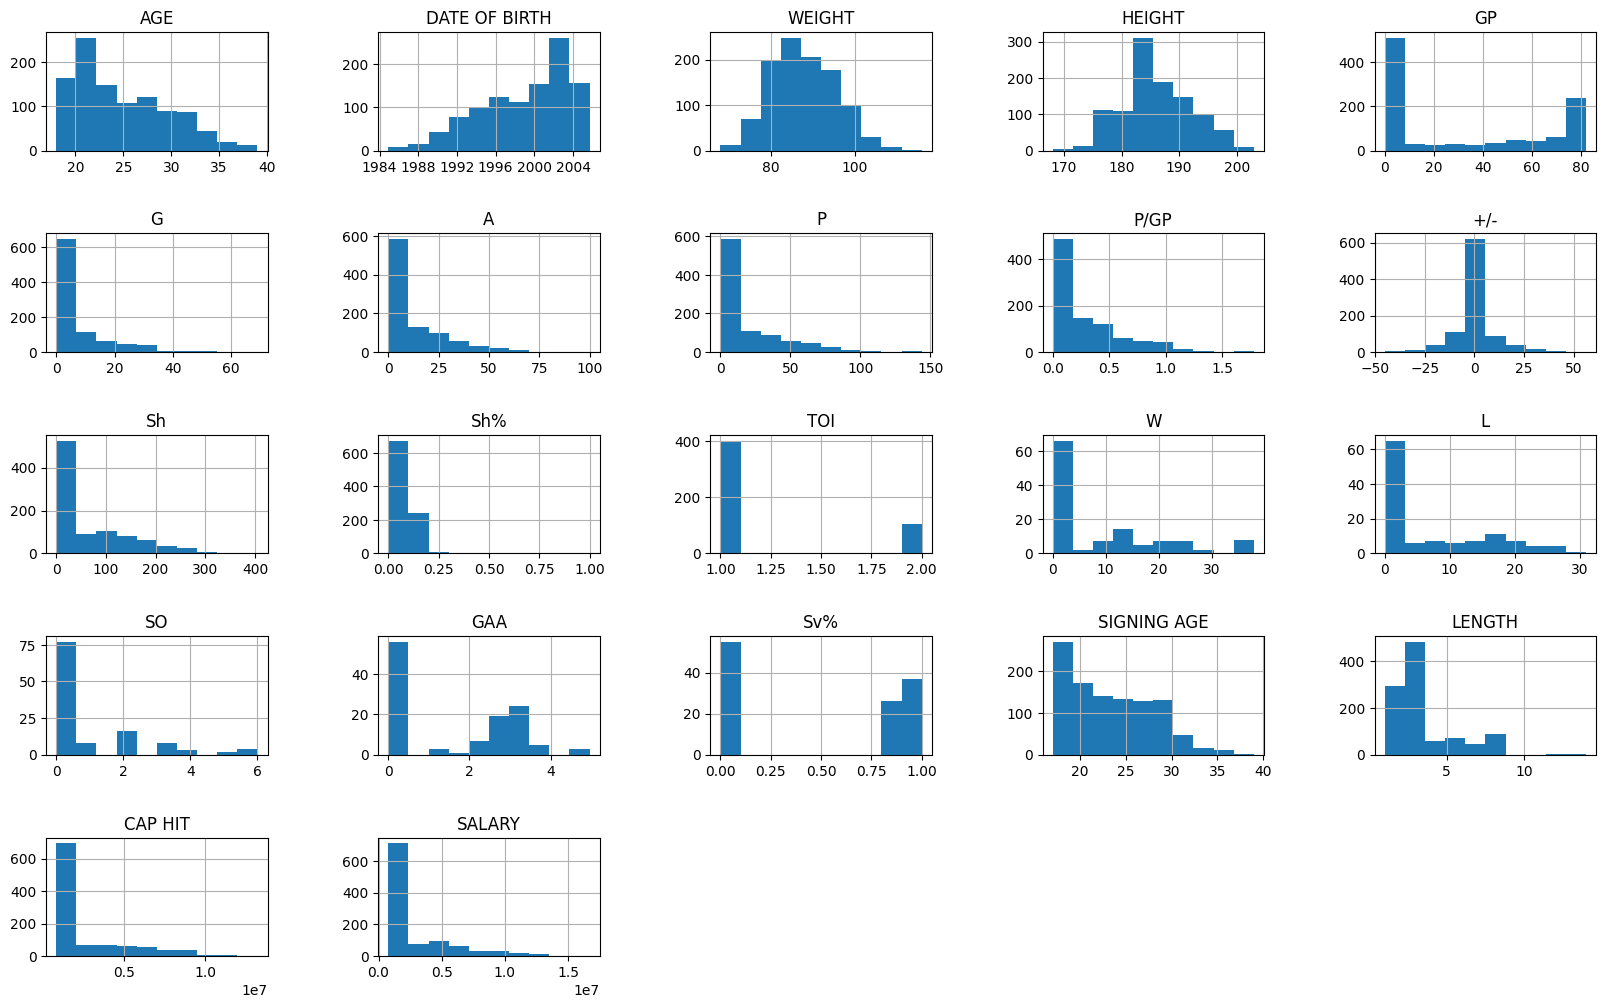

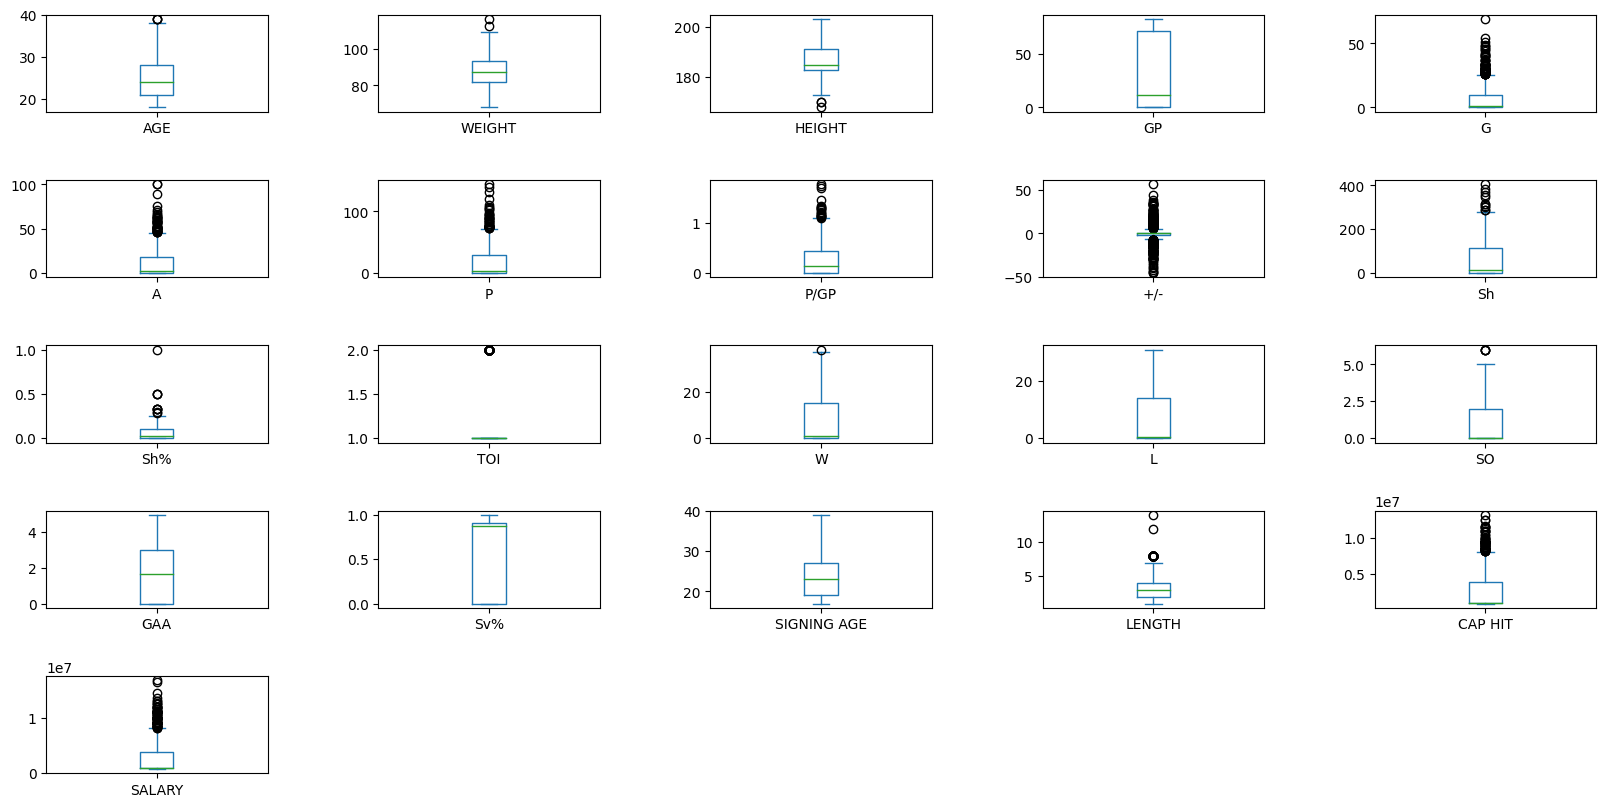

In [15]:
# Histogram of numerical features
df.hist(figsize=(20, 12))
plt.subplots_adjust(hspace=0.7, wspace=0.5)  # Adjust horizontal and vertical space
plt.show()

# Box plots to detect outliers
df.plot(kind='box', subplots=True, layout=(6,5), figsize=(20, 12), sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.7, wspace=0.5)  # Adjust horizontal and vertical space
plt.show()

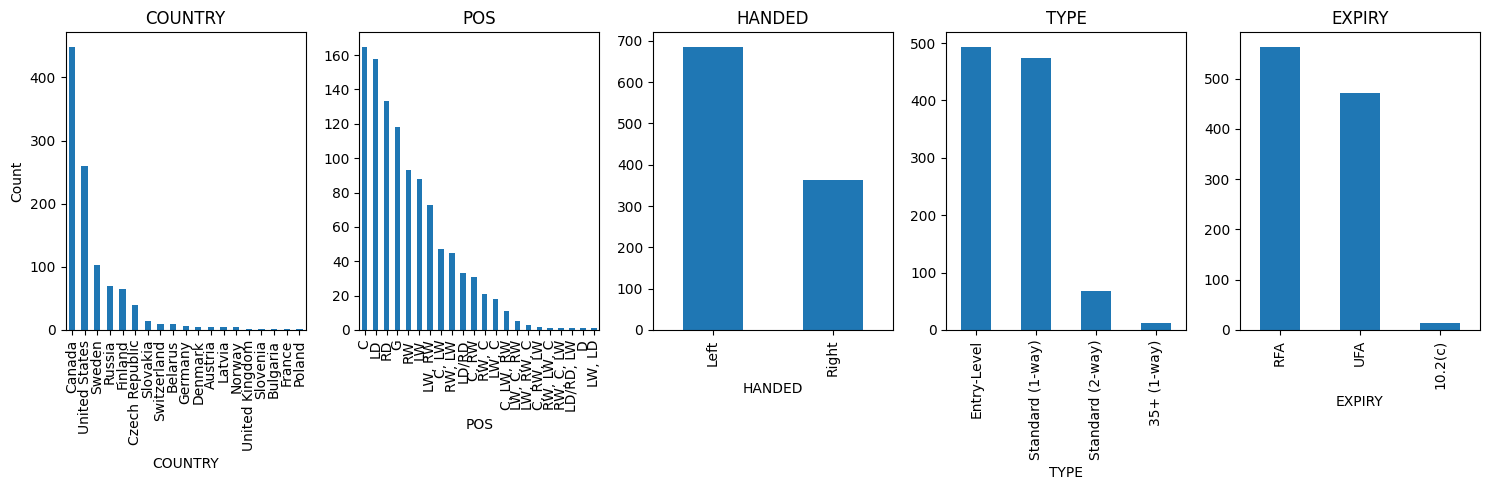

In [16]:
# Set up subplots
cols_to_plot = ["COUNTRY", "POS", "HANDED", "TYPE", "EXPIRY"]
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(15, 5))

# Iterate over columns and create bar plots
for i, col in enumerate(cols_to_plot):
    ax = df[col].value_counts().plot(kind='bar', ax=axes[i])
    ax.set_title(col)
    if i == 0:  # Set y-axis label only in the first subplot
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

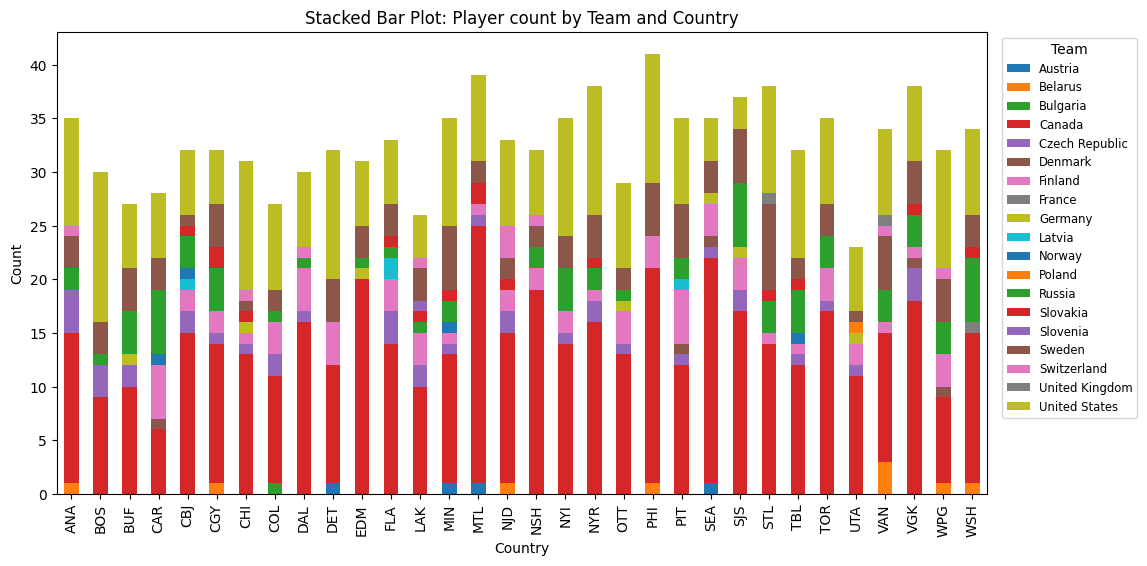

In [17]:
# Creating a stacked bar plot
# Group by 'country' and 'team'
grouped = df.groupby(['TEAM', 'COUNTRY']).size().unstack(fill_value=0)

# Plot the stacked bar plot with custom figure size
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, color=plt.cm.tab10.colors )

# Set plot labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot: Player count by Team and Country')

# Show legend outside the plot
ax.legend(title='Team', fontsize='small', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_12944\1444422002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='COUNTRY', y='P', palette='Set1')


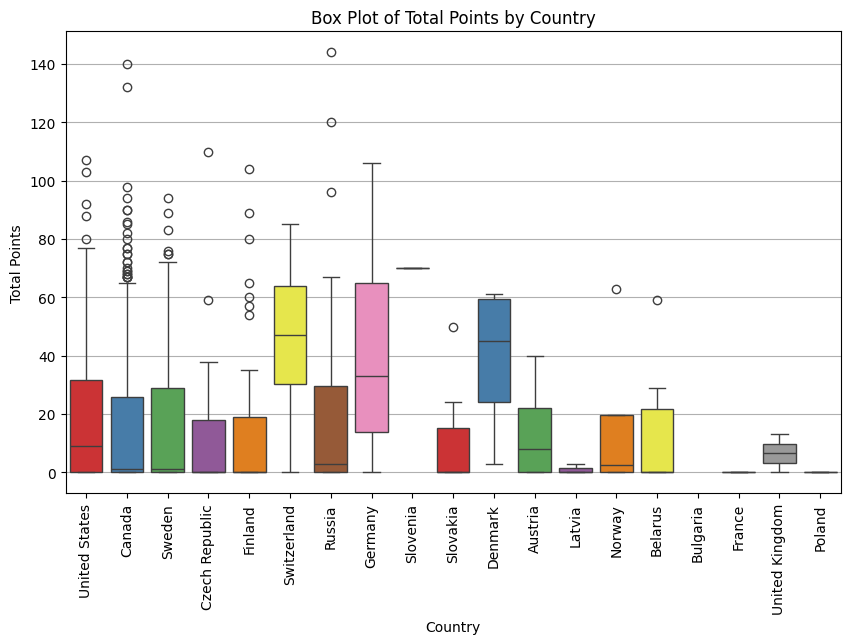

In [18]:
# Create a box plot
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='COUNTRY', y='P', palette='Set1')

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.title('Box Plot of Total Points by Country')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
ax.yaxis.grid(True)

plt.show()

- Interesting note that Switzerland, Germany and Denmark are very high on average. 
- However, barplot earlier showed that there is not so many players in NHL from these countries.

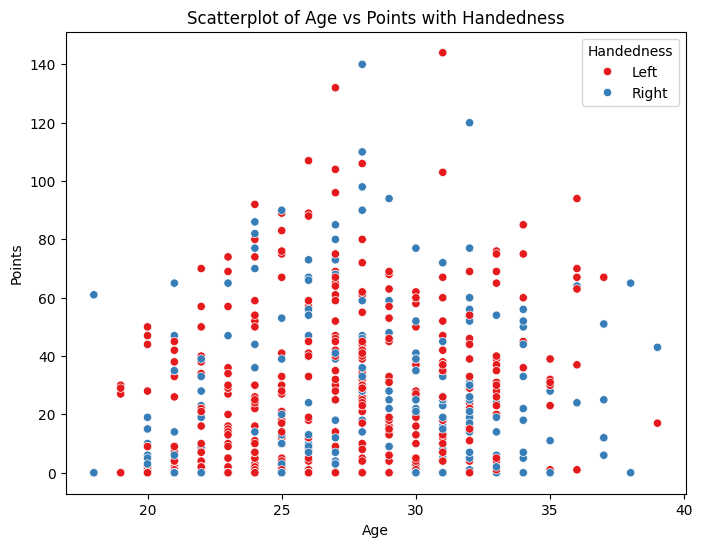

In [19]:
# Create scatterplot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AGE', y='P', hue='HANDED', palette='Set1')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Points')
plt.title('Scatterplot of Age vs Points with Handedness')

# Show legend
plt.legend(title='Handedness')

plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_12944\897008847.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_counts = df.groupby('age_bin')['P'].mean().reset_index()
C:\Users\Toni\AppData\Local\Temp\ipykernel_12944\897008847.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_bin_counts, x='age_bin', y='P', palette='Set1')


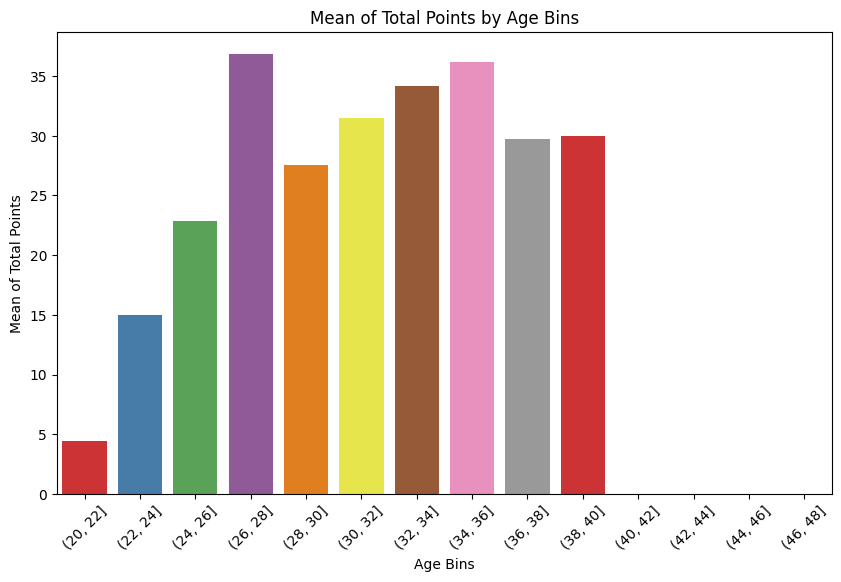

In [20]:
# Bin the age column into 2-year intervals
df['age_bin'] = pd.cut(df['AGE'], bins=range(20, 50, 2))

# Group by age bins and sum the points for each bin
age_bin_counts = df.groupby('age_bin')['P'].mean().reset_index()

# Sort the age bins by the left edge of each bin
age_bin_counts['age_bin'] = age_bin_counts['age_bin'].sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_bin_counts, x='age_bin', y='P', palette='Set1')

# Set plot labels and title
plt.xlabel('Age Bins')
plt.ylabel('Mean of Total Points')
plt.title('Mean of Total Points by Age Bins')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_12944\1879939843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_bin', y='P', palette='Set1')


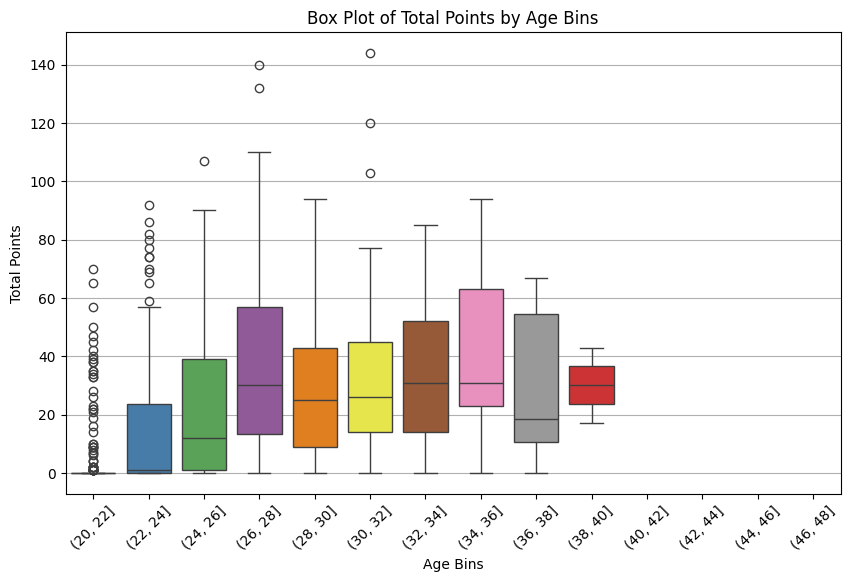

In [21]:
# Bin the age column into 2-year intervals
df['age_bin'] = pd.cut(df['AGE'], bins=range(20, 50, 2))

# Create a box plot
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='age_bin', y='P', palette='Set1')

# Set plot labels and title
plt.xlabel('Age Bins')
plt.ylabel('Total Points')
plt.title('Box Plot of Total Points by Age Bins')

plt.xticks(rotation=45)
ax.yaxis.grid(True)

plt.show()

C:\Users\Toni\.conda\envs\notebookenv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


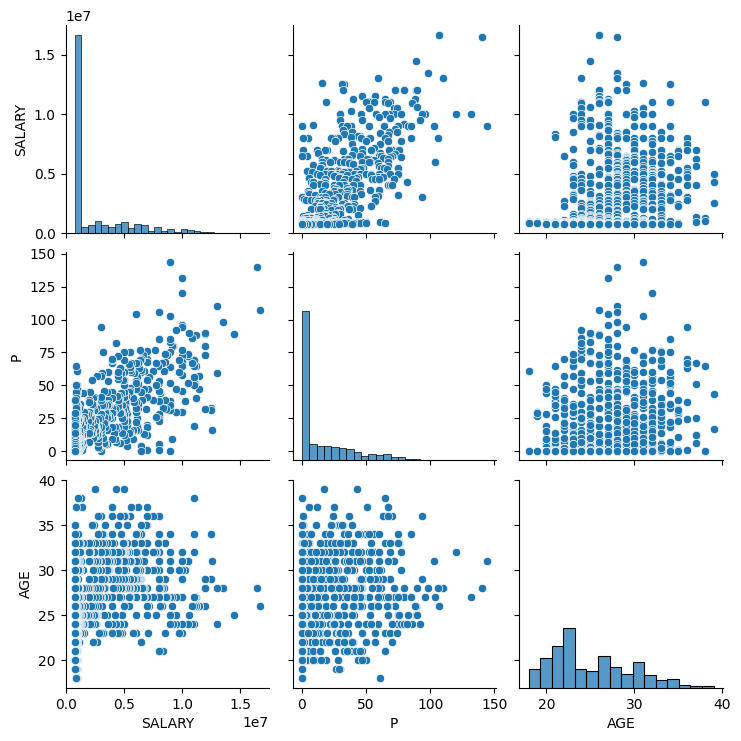

CORRELATION MATRIX:
          SALARY         P       AGE
SALARY  1.000000  0.786823  0.509390
P       0.786823  1.000000  0.471685
AGE     0.509390  0.471685  1.000000


In [22]:
# Create a pair plot to visualize correlations between variables
sns.pairplot(df[['SALARY', 'P', 'AGE']])
plt.show()
# Calculate correlation coefficients using DataFrame's corr() method
print("CORRELATION MATRIX:")
correlation_matrix = df[['SALARY', 'P', 'AGE']].corr()
print(correlation_matrix)

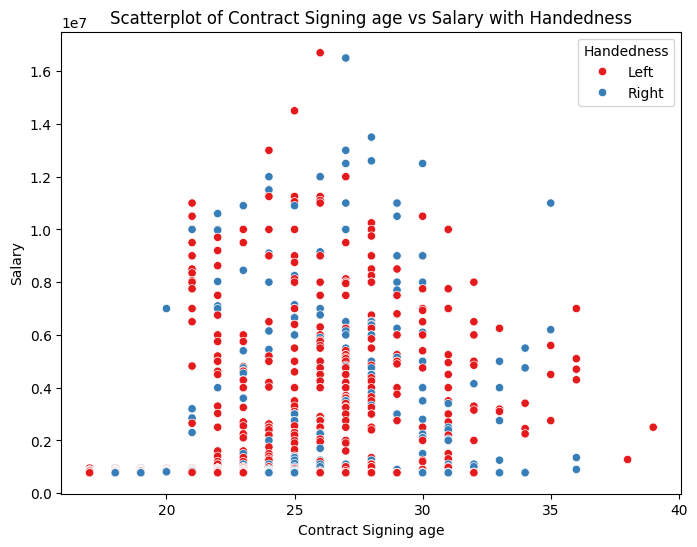

In [23]:
# Create scatterplot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SIGNING AGE', y='SALARY', hue='HANDED', palette='Set1')

# Set plot labels and title
plt.xlabel('Contract Signing age')
plt.ylabel('Salary')
plt.title('Scatterplot of Contract Signing age vs Salary with Handedness')

# Show legend
plt.legend(title='Handedness')

plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_12944\2523231462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_bin', y='SALARY', palette='Set1')


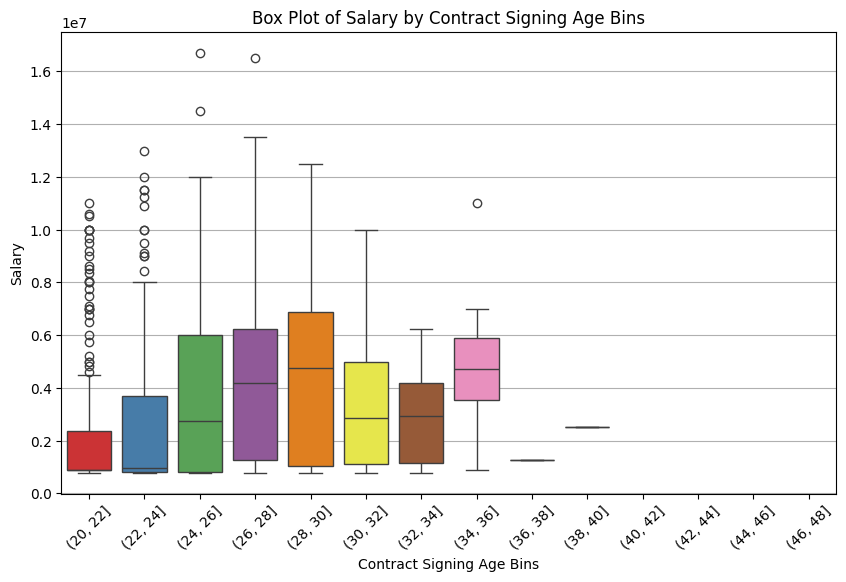

In [30]:
# Bin the age column into 2-year intervals
df['age_bin'] = pd.cut(df['SIGNING AGE'], bins=range(20, 50, 2))

# Create a box plot
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='age_bin', y='SALARY', palette='Set1')

# Set plot labels and title
plt.xlabel('Contract Signing Age Bins')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Contract Signing Age Bins')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.grid(True)

plt.show()

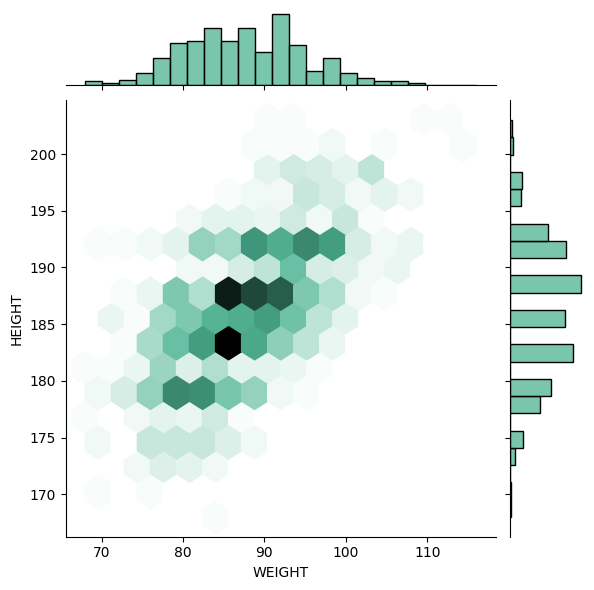

In [25]:
sns.jointplot(data=df, x="WEIGHT", y="HEIGHT", kind="hex", gridsize=15, color="#4CB391")

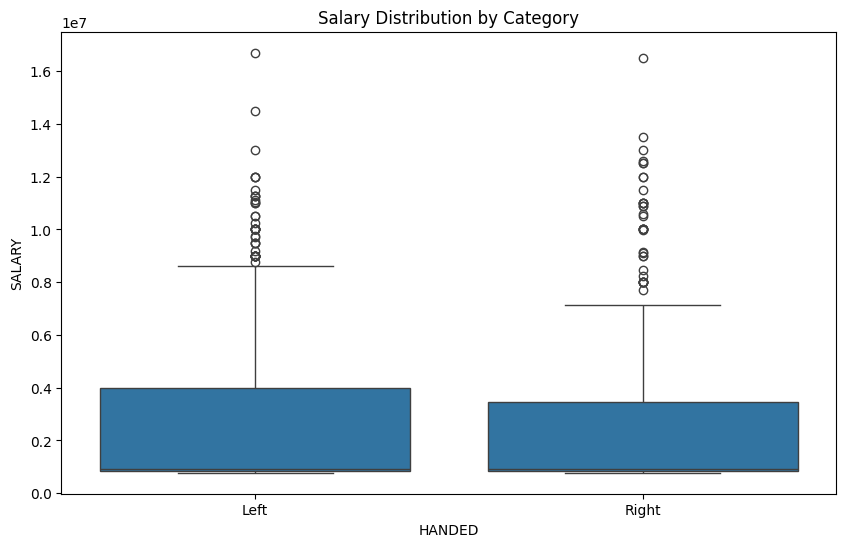

In [34]:
# Summary statistics by left/right handed
summary = df.groupby('HANDED')['SALARY'].describe()

# Box plot to compare salary distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='HANDED', y='SALARY', data=df)
plt.title('Salary Distribution by Category')
plt.show()

In [31]:
# Prepaire data by splitting players and goaltenders to different datasets

# Dataframe players
dfp = df[df['POS'] != 'G']
# Dataframe goalies
dfg = df[df['POS'] == 'G']